In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

# Paintings

## Get data

### Import data in your notebook

In [14]:
from vincentvanbot.data import get_data_locally
from vincentvanbot.preprocessing.utils import jpg_to_array, get_jpg_link, resize_image
from sklearn.pipeline import Pipeline
from vincentvanbot.preprocessing.imagevectorizer import ImageVectorizer
from vincentvanbot.preprocessing.imageresizer import ImageResizer
import cv2
from vincentvanbot.preprocessing.utils import get_jpg_link
from vincentvanbot.preprocessing.pipeline import build_pipe

In [3]:
df = get_data_locally()
pipe = build_pipe(dim=(420,360))
df_transformed = pipe.fit_transform(df)
df_transformed.shape

(10, 12)

In [4]:
df_transformed.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME,IMAGE
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/art/a/aachen/adonis.jpg,painting,mythological,German,1601-1650,"[[[109, 106, 87], [116, 113, 94], [111, 108, 8..."
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/art/a/aachen/allegory.jpg,painting,mythological,German,1601-1650,"[[[95, 89, 77], [81, 76, 64], [68, 65, 53], [5..."
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/art/a/aachen/allegorz.jpg,painting,mythological,German,1601-1650,"[[[125, 104, 59], [94, 72, 37], [63, 39, 16], ..."
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/art/a/aachen/antiope.jpg,painting,mythological,German,1601-1650,"[[[56, 49, 43], [49, 42, 36], [63, 56, 50], [7..."
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/art/a/aachen/athena.jpg,painting,mythological,German,1601-1650,"[[[98, 86, 65], [82, 71, 63], [66, 55, 57], [4..."


### Built KNN

In [13]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [32]:
#load image

def load_image(html_link):
    jpg_link = get_jpg_link(html_link)
    img = jpg_to_array(jpg_link)
    #x = np.expand_dims(x, axis=0)
    X = resize_image(img,width=420,height=360)
    return img, X


shape of x:  (360, 420, 3)
data type:  uint8


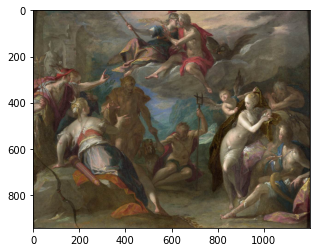

In [33]:
img, X = load_image("https://www.wga.hu/html/a/aachen/gods.html")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [85]:
# Read scaled images as numpy arrays
images = df_transformed['IMAGE'].iloc[:,]

In [137]:
# Flatten so we have ndarrays of shape (108810,)
def flatten_images():
    
    flat_images = [image.flatten() for image in images]
    return flat_images

flatten_images()[1].shape

(453600,)

In [100]:
# fit the KNN model

model = NearestNeighbors(n_neighbors=3)
model.fit(flat_images)
NearestNeighbors(n_neighbors=3)

#connections between neighboring points:
A = model.kneighbors_graph(flat_images)
A.toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1.]])

In [139]:
model.kneighbors(flat_images,n_neighbors=3)

(array([[    0.        , 37515.61746793, 38147.06809179],
        [    0.        , 36507.9532294 , 42860.66881186],
        [    0.        , 39143.81358529, 39656.70740241],
        [    0.        , 42860.18356237, 43776.9967106 ],
        [    0.        , 41741.6538484 , 48976.87322604],
        [    0.        , 43283.11326603, 43461.35076134],
        [    0.        , 41741.6538484 , 42855.0418154 ],
        [    0.        , 39009.85211456, 40982.56568347],
        [    0.        , 36507.9532294 , 38147.06809179],
        [    0.        , 37515.61746793, 40982.56568347]]),
 array([[0, 9, 8],
        [1, 8, 0],
        [2, 8, 0],
        [3, 9, 0],
        [4, 6, 0],
        [5, 0, 9],
        [6, 4, 0],
        [7, 0, 9],
        [8, 1, 0],
        [9, 0, 7]]))

In [106]:
idx_closest = model.kneighbors(flat_images,n_neighbors=3)[1]

array([[0, 9, 8],
       [1, 8, 0],
       [2, 8, 0],
       [3, 9, 0],
       [4, 6, 0],
       [5, 0, 9],
       [6, 4, 0],
       [7, 0, 9],
       [8, 1, 0],
       [9, 0, 7]])

In [129]:
idx_closest[]

5

In [133]:
idx_closest[:,0]

TypeError: list indices must be integers or slices, not tuple

In [141]:
lst = []
for idx in idx_closest:
    img = image.load_img(flat_images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    lst.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

<class 'numpy.ndarray'> (1203, 1500, 3)


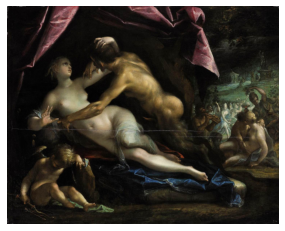

In [24]:
# grab a random image
def load_image():
    random_img_html = df_transformed.iloc[np.random.randint(0,len(df_transformed))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    random_img_arr = jpg_to_array(random_img_jpg)

    print(type(random_img_arr), random_img_arr.shape)

    # display  image
    plt.imshow(random_img_arr)
    plt.axis('off');

load_imgage()